# The Team Formation Survey Report

# Introduction


In the team formation survey, we asked the responders to imagine a scenario where they were an instructor of a class. They were then given tasks where they had to from teams for their class. There is software made by other students which takes into account skillsets and time to form the most compatible teams for any class. This survey's goal was to identify the best visualization to display information (i.e., Time, Skills score) in that software. In this survey, responders were presented with different circumstances which associated with  different type of graph. The primary aim of this survey is to identify which graph yields the most accurate results in limited time.
Theses graphs will be used to display different information in the software - Team Formation.

In order to formulate questions, we followed the general structure provided by the instructors (Dr. Bowen) and the student(s) who had previously worked on this project.

General Structure:
- Basic interpretability
    - We asked a simple question to test if the responder understands the graph.
- Moving individuals
    - We provided a set of graphs for two teams (i.e Team A, Team B) and asked the responder to move an individual from one team to the other team depending on the question.
- Comparing team sets
    - Here we asked the responder to explore two different scenarios (each scenario contained three different team) and provide an answer based on the question. 
- General preference (rank viz choices)
    - At the end, we asked the responder to state their preference as to which graph is the best along with their appropriate reasoning for the same.
    
We followed this general structure and based on this; we came up with different questions in order to test responder's understanding for each graph. The graphs were created using Python. We used Qualtrics as a data collection tool and analysed the data collected using Python. The main goal of study is to build on and further improvise the previous study by adding in better graphs and improving the questionnaires. In the analysis section, we aim to find a relationship between the time taken by responders  to complete the questionnaire and the accuracy of their responses.

## The Questionnaire

Up until now, we have made use of 5 different types of graphs:

1. Stack Bar Graph
2. Group Bar Graph
3. Grid View
4. Heat Map
5. Tally

Parallel to the pervious study, we decided to use the stack bar graph and group bar graph to create teams based on student skills.

The student skills are as follow: 

- Website: how good they are at designing websites.
- Database: how good they are at writing code for databases.
- Communication: how good they are with talking to clients and customers.
- Time: how good they are with time management.

Here, the students responded to each skill on a scale from 1 - 5, where 1 indicated that they are bad at that particular skill, and 5 indicated they are highly proficient at that skill.

Additionally, Grid View, Heat Map, and Tally were used to create team based on Time availability.

## Implementing Counterbalancing

As we were working on creating the survey, we realized that the survey results might be biased as we were asking for graphs in a specific order (i.e., stack bar graph followed by group bar graph). Since each graph is different and has its drawbacks, we introduced counterbalancing to make our results fair and reliable. We used the Latin square technique for our survey where we will **n** number of the version of our survey for the **n** number of graphs. For instance, if the survey has two types of graphs, then there will be two versions. 

The first version will have graph type 1 followed by graph type 2.

The second version will have graph type 2 followed by graph type 1.

 For the Latin Square counterbalancing, we created two versions of section 1 - Skills. 

- Version 1 had Group bar graph first followed by Stacked bar graph
- The Version 2 had Stacked bar graph first followed by Group bar graph

### Stack bar graph
<img src ="../visualizations/VizSkills/p13v3s/q1a.png" width="300"/>

### Group bar graph
<img src ="../visualizations/VizSkills/p13v3g/q1a.png" width="300"/>

For Section 2 - Time, as there are three graphs, there will be 3 version.

- Version 1 has Grid View first, then Heat Map and Tally in the end.
- The Version 2 has Heat Map first, then Tally and Grid View in the end.
- The Version 3 has Tally first, then Grid View and Heat Map in the end.

### Grid View
<img src ="../visualizations/section 2/Part 1/GridView/Q1_a_whole.png" width="500"/>

### Heat Map
<img src ="../visualizations/section 2/Part 1/HeatMap/Q1_a_whole.png" width="500"/>

### Tally
<img src ="../visualizations/section 2/Part 3/Tally/3a/s1_2.png" width="300"/>

It is critical to not the the conclusion made in the survey will not be accurate as we are working with a small dataset.


In [1]:
import pandas as pd
import script as sc
import numpy as np

df = pd.DataFrame(pd.read_csv('../report/data/section 1/SkillsV1.csv')).iloc[-2:].reset_index()
df = sc.clean_name(df)
df1 = pd.DataFrame(pd.read_csv('../report/data/section 1/SkillsV2.csv')).iloc[-2:].reset_index()
df1 = sc.clean_name(df1)

# Exploratory Data Analysis (EDA)

In the EDA, we will explore the data which we have collected using Qualtrics.

For each section, we are going to find:

1. The average time taken for each version of a section.
2. Calculate the average accuracy for each version of a section.
3. plot a graph to see time taken to complete each question of every responder

As we were also recording the number of clicks performed by each responder. We can find how many times a responder has changed their answer. In a way, we are seeing if the responder was confused in a question where they had to change their answer a couple of times because they were unsure if they are submitting the correct response.

As each section is following a general structure which was mentioned in the introduction. Before no.3 is plotted, the general structure as per question will be provided.

## Section 1 - Skills

In [2]:
gdf = sc.getAverageTime(df,df1)

,Id,Duration (in seconds),Version
0,Responder 1,1185,1
1,Responder 2,1385,1
2,Responder 3,654,2
3,Responder 4,1171,2


,Average Duration (in seconds)
Version,
1,1285.0
2,912.5


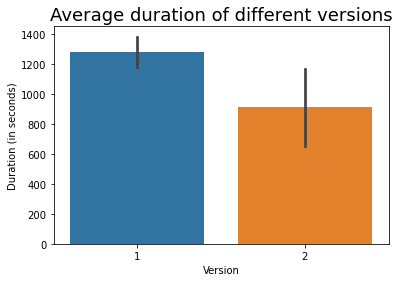

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.barplot(x="Version", y="Duration (in seconds)", data = gdf[0], estimator = np.mean)
plt.title('Average duration of different versions', fontsize=18)
plt.show()
# Make it for Section 2 - Time as well

### As we can see the average time taken by version 1 is 1285.0 seconds which was 372.5 seconds more than the average time taken by version 2 (912.5 seconds).

In [4]:
print('Version 1')
s1v1 = sc.get_correct_ans(df, "../report/answer/section 1/S1V1.csv", ['Responder 1', 'Responder 2'])
print('Version 2')
s1v2 = sc.get_correct_ans(df1, "../report/answer/section 1/S1V2.csv", ['Responder 3', 'Responder 4'])
# Calculate the average accuracy and then compare it with average time

Version 1


,Id,Num. Questions,Correct Answer,Accuracy,Average Accuracy
0,Responder 1,32,19,59.38%,67.19%
1,Responder 2,32,24,75.00%,67.19%


Version 2


,Id,Num. Questions,Correct Answer,Accuracy,Average Accuracy
0,Responder 3,32,20,62.50%,67.19%
1,Responder 4,32,23,71.88%,67.19%


### The Responder 2 has the most number of correct answer. Surprisingly, The average accuracy for both the version is at 67.19%

The General Structure for this section was: 

Version 1: Group Bar Graphs were at the beginning then Stack Bar Graphs

1. Basic interpretability - Group
    - Q1-Q4 : Identify Best Team 3 teams vs 3 teams
    - Q5-Q8 : Identify Best Team 4 teams vs 3 teams
2. Moving individuals - Group
    - Q9-Q12 : Move a Student
3. Comparing team sets - Group
    - Q13-Q16 : Best Scenario
4. Basic interpretability - Stack
    - Q17-Q20 : Identify Best Team 3 teams vs 3 teams
    - Q21-Q24 : Identify Best Team 4 teams vs 3 teams
5. Moving individuals - Stack
    - Q25-Q28 : Move a Student
6. Comparing team sets - Stack
    - Q29-Q32 : Best Scenario
7. General preference
    - As there is no right answer here, we are not taking the timing of gerenal preference into account.
    


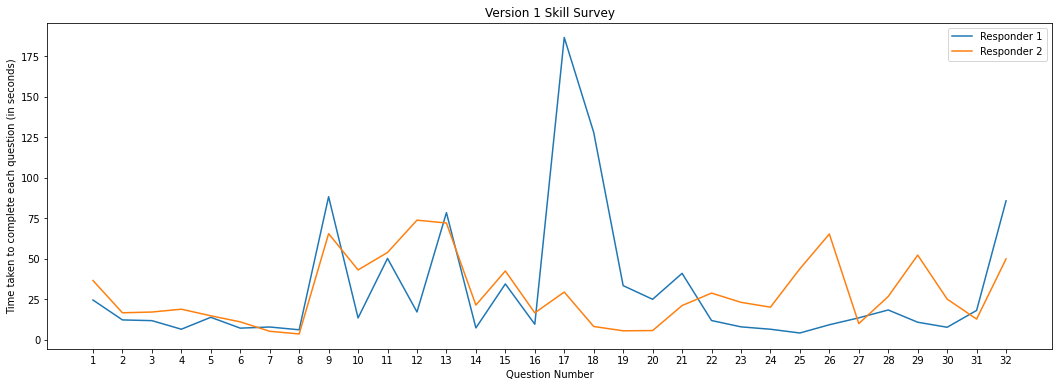

In [5]:
sc.time_display(df, 'Version 1 Skill Survey', 1, 2)

As expected less time was taken in the beginning at basic interpretability. We saw a huge spike at Q9 and the time taken is higher compared to basic interpretability. The time taken is higher till Q16 than it is highest at Q17 for responder 1. This is a kind of abnormality. Probably, responder 1 took a pause. Responder 1 was fairly quick in the rest of the question compare to responder 2. While responder 1 has abnormal timing for the stack bar graph, responder 2 had a similar trend for both graphs where time taken was less at basic interpretability and high for moving individuals and comparing team sets. 

Version 2: Stack Bar Graphs were at the beginning then Group Bar Graphs

1. Basic interpretability - Stack
    - Q1-Q4 : Identify Best Team 3 teams vs 3 teams
    - Q5-Q8 : Identify Best Team 4 teams vs 3 teams
2. Moving individuals - Stack
    - Q9-Q12 : Move a Student
3. Comparing team sets - Stack
    - Q13-Q16 : Best Scenario
4. Basic interpretability - Group
    - Q17-Q20 : Identify Best Team 3 teams vs 3 teams
    - Q21-Q24 : Identify Best Team 4 teams vs 3 teams
5. Moving individuals - Group
    - Q25-Q28 : Move a Student
6. Comparing team sets - Group
    - Q29-Q32 : Best Scenario
7. General preference
    - As there is no right answer here, we are not taking the timing of gerenal preference into account.

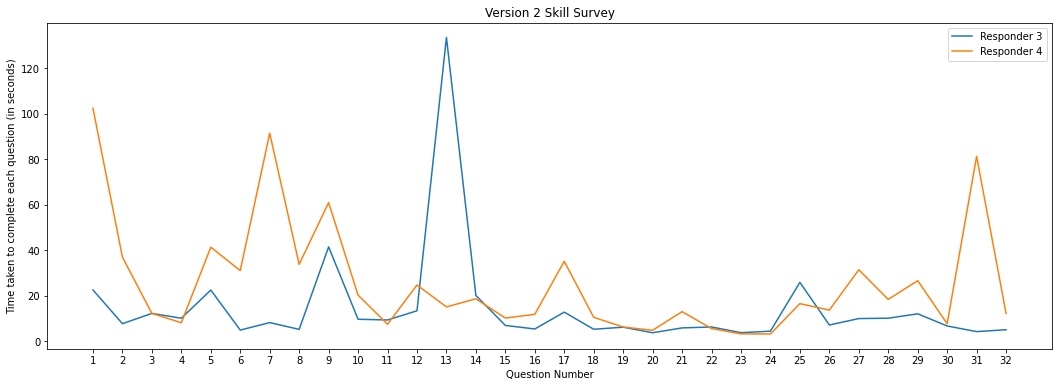

In [6]:
sc.time_display(df1, 'Version 2 Skill Survey', 3, 4)

Version 2 has abnormal trends to follow. A possible explanation would that responder 3 and 4 are getting used to survey which explains why they were fairly quick after Q17. Another explanation can be that stack bar graphs was overwhelming and diffcult to interpret compare to the group bar graph. Again an abnormaility at Q13 but Q13 belongs to compare team set section where the responder has to look at 6 different graph to get an correct answer. Therefore, it might explain this huge spike.

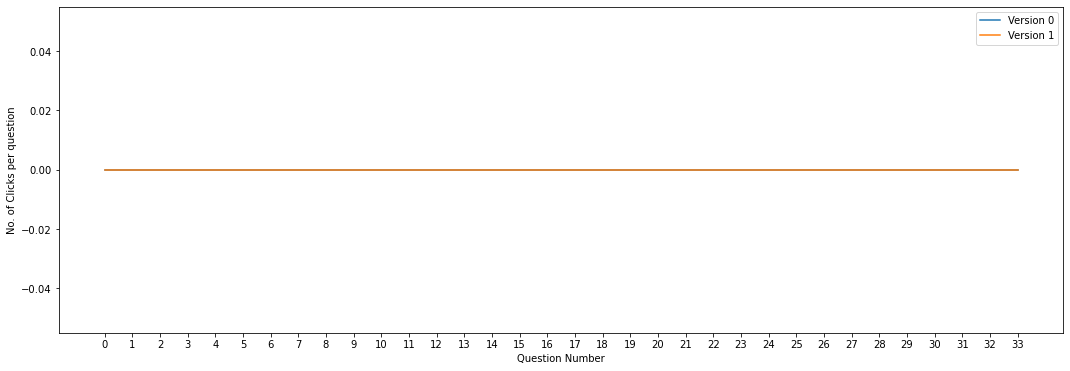

In [7]:
# Explain what is check confused
sc.check_confused([df, df1])

Surprising, every responder were certain of their answer and they did not change their answer once a response was selected. 

# Section 2 - Time

In [8]:
import pandas as pd

df1 = pd.DataFrame(pd.read_csv('../report/data/section 2/TimeV1.csv'))[2:4].reset_index()
df1 = sc.clean_name(df1)
df2 = pd.DataFrame(pd.read_csv('../report/data/section 2/TimeV2.csv'))[2:4].reset_index()
df2 = sc.clean_name(df2)
df3 = pd.DataFrame(pd.read_csv('../report/data/section 2/TimeV3.csv'))[2:4].reset_index()
df3 = sc.clean_name(df3)

In [9]:
gdf1 = sc.getAverageTime(df1,df2,df3)

,Id,Duration (in seconds),Version
0,Responder 1,1126,1
1,Responder 2,854,1
2,Responder 3,739,2
3,Responder 4,1226,2
4,Responder 5,909,3
5,Responder 6,2141,3


,Average Duration (in seconds)
Version,
1,990.0
2,982.5
3,1525.0


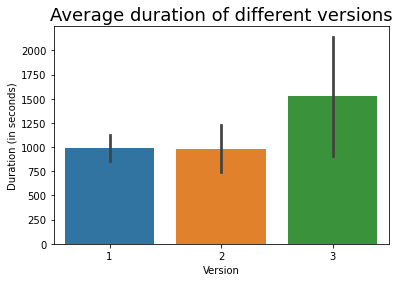

In [10]:
%matplotlib inline
sns.barplot(x="Version", y="Duration (in seconds)", data = gdf1[0], estimator = np.mean)
plt.title('Average duration of different versions', fontsize=18)
plt.show()

### Version 3 has highest avreage time taken at 1525.0 seconds and the difference between Version 3 and Version 2 (which was the quickest time taken to complete at 982.5 seconds) is 542.5 seconds (approx 9 mins)

In [11]:
print('Version 1')
s2v1 = sc.get_correct_ans(df1, "../report/answer/section 2/S2V1.csv", ['Responder 1', 'Responder 2'])
print('Version 2')
s2v2 = sc.get_correct_ans(df2, "../report/answer/section 2/S2V2.csv", ['Responder 3', 'Responder 4'])
print('Version 3')
s2v3 = sc.get_correct_ans(df3, "../report/answer/section 2/S2V3.csv", ['Responder 5', 'Responder 6'])
# Calculate the average accuracy and then compare it with average time

Version 1


,Id,Num. Questions,Correct Answer,Accuracy,Average Accuracy
0,Responder 1,54,42,77.78%,75.00%
1,Responder 2,54,39,72.22%,75.00%


Version 2


,Id,Num. Questions,Correct Answer,Accuracy,Average Accuracy
0,Responder 3,54,36,66.67%,77.78%
1,Responder 4,54,48,88.89%,77.78%


Version 3


,Id,Num. Questions,Correct Answer,Accuracy,Average Accuracy
0,Responder 5,54,42,77.78%,87.04%
1,Responder 6,54,52,96.30%,87.04%


### Version 3 has the highest average accuracy at 87.04% while Version 1 has the least average accuracy at 75%. The responder 6 in version 3 had the highest accuracy of 96.30% while the responder 3 from version 2 has the least average accuracy of 66.67%


Version 1: Grid View were at the beginning then Heat Map and Tally in the end.

1. Basic interpretability - Grid View
    - Q1-Q5 : Basic interpretability
    - Q6-Q9 : When can everyone meet
    - Q10-Q14 : Team Opportunities
2. Moving individuals - Grid View
    - Q15 : Move a Student
3. Comparing team sets - Grid View
    - Q16-Q18 : Best Scenario
4. Basic interpretability - Heat Map
    - Q19-Q23 : Basic interpretability
    - Q24-Q27 : When can everyone meet
    - Q28-Q32 : Team Opportunities
5. Moving individuals - Heat Map
    - Q33 : Move a Student
6. Comparing team sets - Heat Map
    - Q34-Q36 : Best Scenario
7. Basic interpretability - Tally
    - Q37-Q41 : Basic interpretability
    - Q42-Q45 : When can everyone meet
    - Q46-Q50 : Team Opportunities
8. Moving individuals - Tally
    - Q51 : Move a Student
9. Comparing team sets - Tally
    - Q52-Q54 : Best Scenario
10. General preference
    - As there is no right answer here, we are not taking the timing of gerenal preference into account.

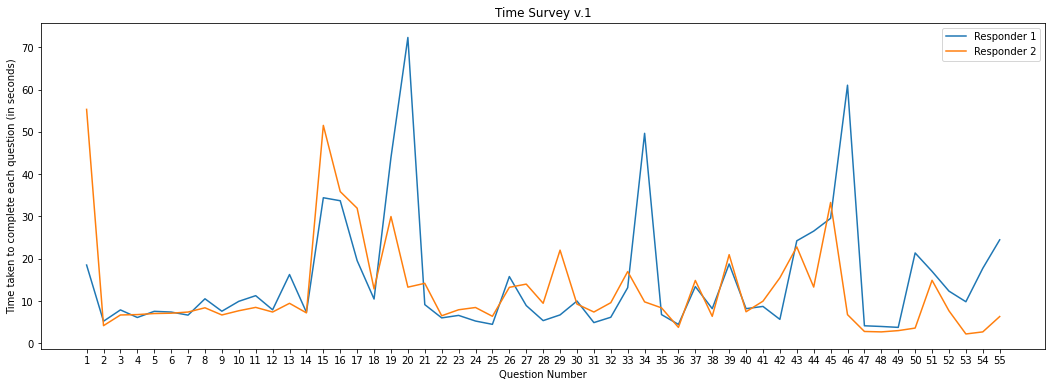

In [12]:
sc.time_display(df1, 'Time Survey v.1', 1, 2)

Version 2: Heat Map were at the beginning then Tally and Grid View in the end.

1. Basic interpretability - Heat Map
    - Q1-Q5 : Basic interpretability
    - Q6-Q9 : When can everyone meet
    - Q10-Q14 : Team Opportunities
2. Moving individuals - Heat Map
    - Q15 : Move a Student
3. Comparing team sets - Heat Map
    - Q16-Q18 : Best Scenario
4. Basic interpretability - Tally
    - Q19-Q23 : Basic interpretability
    - Q24-Q27 : When can everyone meet
    - Q28-Q32 : Team Opportunities
5. Moving individuals - Tally
    - Q33 : Move a Student
6. Comparing team sets - Tally
    - Q34-Q36 : Best Scenario
7. Basic interpretability - Grid View
    - Q37-Q41 : Basic interpretability
    - Q42-Q45 : When can everyone meet
    - Q46-Q50 : Team Opportunities
8. Moving individuals - Grid View
    - Q51 : Move a Student
9. Comparing team sets - Grid View
    - Q52-Q54 : Best Scenario
10. General preference
    - As there is no right answer here, we are not taking the timing of gerenal preference into account.

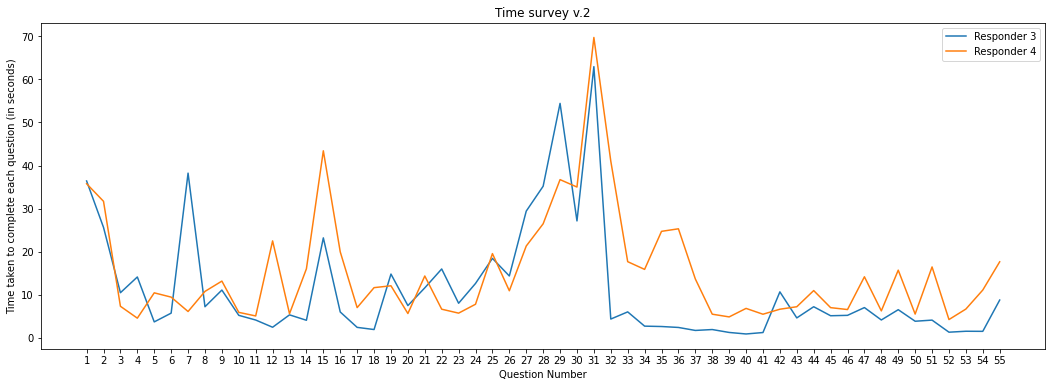

In [13]:
sc.time_display(df2, 'Time survey v.2', 3, 4)

Version 3: Tally were at the beginning then Grid View and Heat Map in the end.

1. Basic interpretability - Tally
    - Q1-Q5 : Basic interpretability
    - Q6-Q9 : When can everyone meet
    - Q10-Q14 : Team Opportunities
2. Moving individuals - Tally
    - Q15 : Move a Student
3. Comparing team sets - Tally
    - Q16-Q18 : Best Scenario
4. Basic interpretability - Grid View
    - Q19-Q23 : Basic interpretability
    - Q24-Q27 : When can everyone meet
    - Q28-Q32 : Team Opportunities
5. Moving individuals - Grid View
    - Q33 : Move a Student
6. Comparing team sets - Grid View
    - Q34-Q36 : Best Scenario
7. Basic interpretability - Heat Map
    - Q37-Q41 : Basic interpretability
    - Q42-Q45 : When can everyone meet
    - Q46-Q50 : Team Opportunities
8. Moving individuals - Heat Map
    - Q51 : Move a Student
9. Comparing team sets - Heat Map
    - Q52-Q54 : Best Scenario
10. General preference
    - As there is no right answer here, we are not taking the timing of gerenal preference into account.

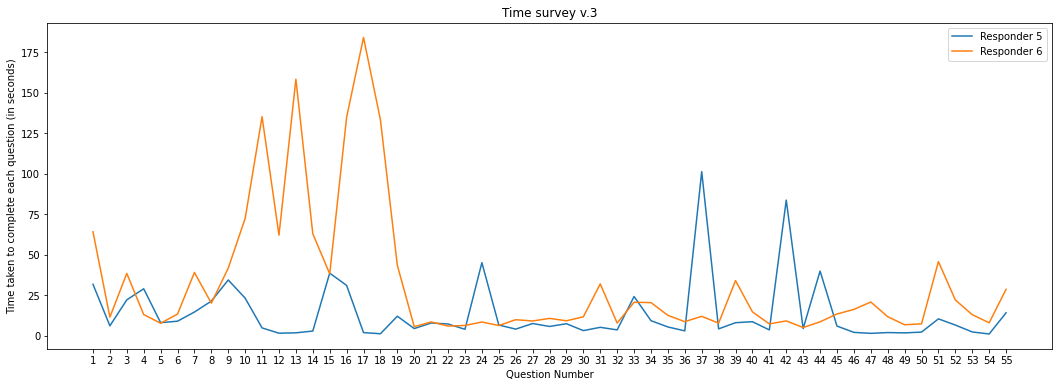

In [14]:
sc.time_display(df3, 'Time survey v.3', 5, 6)

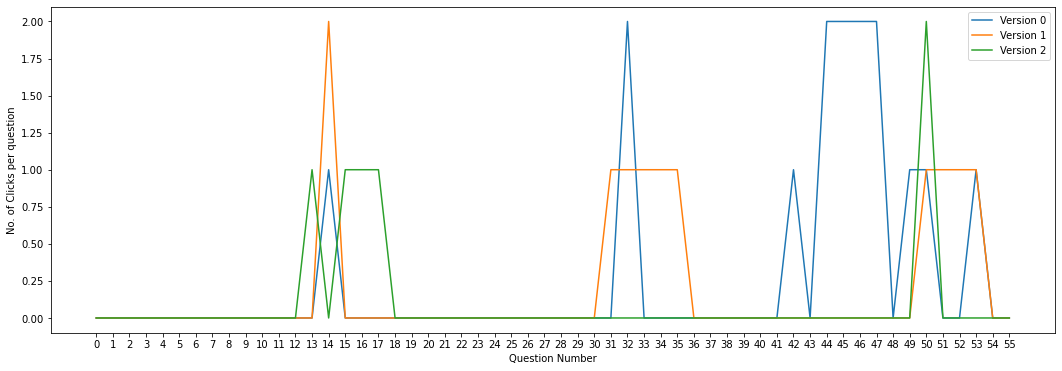

In [15]:
# Explain what is check confused
sc.check_confused([df1, df2, df3])

# Analysis

In the analysis, we are simple going to take average accuracy and average time for each version of Section and compare it with the version.

In [25]:
analysis = pd.DataFrame.from_dict(
    {
        'Section': ['1','1','2','2','2'],
        'Version': ['1', '2', '1', '2', '3'],
        'Average Time (per version)': [gdf[1]['Average Duration (in seconds)'][0], gdf[1]['Average Duration (in seconds)'][1],
        gdf1[1]['Average Duration (in seconds)'][0], gdf1[1]['Average Duration (in seconds)'][1], gdf1[1]['Average Duration (in seconds)'][2]],
        'Average Accuracy (per version)': [s1v1, s1v2, s2v1, s2v2, s2v3]

    }
)

analysis

,Section,Version,Average Time (per version),Average Accuracy (per version)
0,1,1,1285.0,67.187500
1,1,2,912.5,67.187500
2,2,1,990.0,75.000000
3,2,2,982.5,77.777778
4,2,3,1525.0,87.037037


In [21]:
s2v1

75.0

# Conclusion

Unfortunately, as a mentioned before this dataset is small. Therefore, it is diffcult to make any conclusion.

## General Feedback and Suggested Improvement


### Section 1 V1 & V2

- Move a student Q26 for V1 and Q10 for V2 is the same graph as Q25 and Q9. (Need a fix!)
- Too many graphs!
- We can add Q1_Timer for Timer in Qualtrics. Make it easier to analyze the data

### Section 2 V1, V2 & V3

- Too many graphs!
- Why use Tally? It is the worst one!
- If there is a better way to present tally, it would be great!
- Part 3 graphs ("comparing Team Set") are diffcult to see when the responders has a smaller screen. (i.e 13 inchs)
- Figure out who to move in heat map (ishika)

# Future Improvement

- Total time has the general preference into the total time. We will not consider this into next analysis.
- Add average time taken per each question. As we had small dataset, we did not add this.